# <span style="color:orange">Pet Adoption Analysis and prediction:- BY POWER PUFF GIRLS</span> 

# Importing required libraries!

In [197]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
from copy import deepcopy
from sklearn import neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#import pydot_ng

Populating the interactive namespace from numpy and matplotlib


# Loaded dataset!

In [94]:
df_intakes = pd.read_csv(r'C:\Users\16508\Desktop\DATA-228-BIG DATA\Test\Shelter_newintake.csv')
df_intakes.columns = ['Animal_ID','Name','IntakeDate','FoundLocation','IntakeType','IntakeCondition','AnimalType',
                   'SexUponIntake','Breed','Color','DOB','intake_age_days','intake_age_months','intake_age_years','Age']

df_outcomes = pd.read_csv(r'C:\Users\16508\Desktop\DATA-228-BIG DATA\Test\Shelter_newoutcome.csv')
df_outcomes.columns = ['Animal_ID','Name','Outcome_Date','DOB','Outcome Type','Outcome Subtype','Animal Type',
                    'Sex upon Outcome','outcome_age_days','outcome_age_months','outcome_age_years','Breed','Color']

C:\Users\16508\anaconda3\envs\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [95]:
print ("How many intakes and outcomes do we have?")
print (len(df_intakes), "intakes")
print (len(df_outcomes), "outcomes")
print ("What are the columns?")
print ("INTAKE: ",df_intakes.columns)
print ("OUTCOMES: ",df_outcomes.columns)

How many intakes and outcomes do we have?
139076 intakes
139175 outcomes
What are the columns?
INTAKE:  Index(['Animal_ID', 'Name', 'IntakeDate', 'FoundLocation', 'IntakeType',
       'IntakeCondition', 'AnimalType', 'SexUponIntake', 'Breed', 'Color',
       'DOB', 'intake_age_days', 'intake_age_months', 'intake_age_years',
       'Age'],
      dtype='object')
OUTCOMES:  Index(['Animal_ID', 'Name', 'Outcome_Date', 'DOB', 'Outcome Type',
       'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'outcome_age_days', 'outcome_age_months', 'outcome_age_years', 'Breed',
       'Color'],
      dtype='object')


In [96]:
#print(df_intakes.isnull().sum())

#df_intakes.isnull().values.any()

Animal_ID                0
Name                     0
IntakeDate               0
FoundLocation            0
IntakeType               0
IntakeCondition          0
AnimalType               0
SexUponIntake            1
Breed                    0
Color                    0
DOB                    717
intake_age_days        717
intake_age_months      717
intake_age_years       717
Age                  75748
dtype: int64


True

In [112]:
#df_intakes.drop(['intake_age_days','intake_age_months','intake_age_years'],axis = 1, inplace = True)
#df_intakes = df_intakes.dropna()
df_intakes.info()
#df_intakes['Age'].fillna("1-3 years", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139076 entries, 0 to 139075
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Animal_ID        139076 non-null  object
 1   Name             139076 non-null  object
 2   IntakeDate       139076 non-null  object
 3   FoundLocation    139076 non-null  object
 4   IntakeType       139076 non-null  object
 5   IntakeCondition  139076 non-null  object
 6   AnimalType       139076 non-null  object
 7   SexUponIntake    139075 non-null  object
 8   Breed            139076 non-null  object
 9   Color            139076 non-null  object
 10  DOB              138359 non-null  object
 11  Age              139076 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


## Mearing files!

In [113]:
# Create a new dataframe from the inner join between intakes and outcomes
records = df_intakes.merge(df_outcomes, how='inner', left_on = 'Animal_ID', right_on = 'Animal_ID', suffixes=('_intake', '_outcome'))
print ("Resulting dataframe has", len(records), "records")

Resulting dataframe has 179301 records


In [114]:
records.head()

,Animal_ID,Name_intake,IntakeDate,FoundLocation,IntakeType,IntakeCondition,AnimalType,SexUponIntake,Breed_intake,Color_intake,...,DOB_outcome,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,outcome_age_days,outcome_age_months,outcome_age_years,Breed_outcome,Color_outcome
0,A786884,Brock,3/1/2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Beagle Mix,Tricolor,...,1/3/2017,Transfer,Partner,Dog,Neutered Male,735,24,2,Beagle Mix,Tricolor
1,A706918,Belle,5/7/2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,English Springer Spaniel,White & Liver,...,7/5/2007,Return to Owner,NaN,Dog,Spayed Female,2922,96,8,English Springer Spaniel,White & Liver
2,A724273,Runster,4/14/2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,Basenji Mix,Sable & White,...,4/17/2015,Return to Owner,NaN,Dog,Neutered Male,370,12,1,Basenji Mix,Sable & White
3,A665644,Dummy,10/21/2013,Austin (TX),Stray,Sick,Cat,Intact Female,Domestic Shorthair Mix,Calico,...,9/21/2013,Transfer,Partner,Cat,Intact Female,30,1,0,Domestic Shorthair Mix,Calico
4,A682524,Rio,6/29/2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,Doberman Pinsch & Australian Cattle Dog,Tan & Gray,...,6/29/2010,Return to Owner,NaN,Dog,Neutered Male,1464,48,4,Doberman Pinsch & Australian Cattle Dog,Tan & Gray


## Data Cleaning
Fixing records that don't match and dropping irrelevant columns

In [115]:
#Animal Type, Breed and Color are all consistent across intake and outake.
#DOB appears to be irrelevant because every animal has a DOB even if they were not born in the shelter!
records.drop(['Animal Type','Breed_outcome','Color_outcome','DOB_intake','DOB_outcome','Outcome Subtype'],axis = 1, inplace = True)
records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179301 entries, 0 to 179300
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Animal_ID           179301 non-null  object
 1   Name_intake         179301 non-null  object
 2   IntakeDate          179301 non-null  object
 3   FoundLocation       179301 non-null  object
 4   IntakeType          179301 non-null  object
 5   IntakeCondition     179301 non-null  object
 6   AnimalType          179301 non-null  object
 7   SexUponIntake       179300 non-null  object
 8   Breed_intake        179301 non-null  object
 9   Color_intake        179301 non-null  object
 10  Age                 179301 non-null  object
 11  Name_outcome        179301 non-null  object
 12  Outcome_Date        179301 non-null  object
 13  Outcome Type        179267 non-null  object
 14  Sex upon Outcome    179300 non-null  object
 15  outcome_age_days    179301 non-null  object
 16  ou

## Feature Engineering or Extraction!

**Extract "Spayed" and "Intact" and whether or not that changed during their time in the shelter, and Gender**

In [116]:
#from StringIO import StringIO
def get_gender(val):
    try:
        val_list = val.split(' ')
        return val_list[1]
    except:
        return np.nan
def get_fixed(val):
    try:
        val_list = val.split(' ')
        return val_list[0]
    except:
        return np.nan

records['Gender'] = records['SexUponIntake'].apply(get_gender)
records['fixed_intake'] = records['SexUponIntake'].apply(get_fixed)
records['fixed_outcome'] = records['Sex upon Outcome'].apply(get_fixed)

records['fixed_changed'] = 0
mask = (records['fixed_intake'] == "Intact") & (records['fixed_outcome'] != "Intact")
records.loc[mask, 'fixed_changed'] = 1
mask = (records['fixed_intake'] != "Intact") & (records['fixed_outcome'] == "Intact")
records.loc[mask, 'fixed_changed'] = -1

records['fixed_changed'].value_counts()

 0    115295
 1     63439
-1       567
Name: fixed_changed, dtype: int64

# Creating "Age" into buckets for better analysis!

In [117]:
import re

def get_age_bucket(val):
    if re.search("day", val):
        return "Less than 1 week"
    elif re.search("week", val):
        return "1-6 weeks"
    elif re.search("[1,2,3,4,5,6] month", val):
        return "1-6 months"
    elif re.search("[7,8,9,10,11,12] month", val):
        return "7-12 months"
    elif re.search("[1,2,3] year", val):
        return "1-3 years"
    elif re.search("[4,5,6] year", val):
        return "4-6 years"
    elif re.search("year", val):
        return "7+ years"
    else:
        return "other"

records['Age_Bucket'] = records['Age'].apply(get_age_bucket)
records['Age_Bucket'].value_counts()

1-3 years           130929
1-6 months           20037
4-6 years             8663
1-6 weeks             8252
7+ years              5768
7-12 months           4000
Less than 1 week      1652
Name: Age_Bucket, dtype: int64

**Extract popular types of breeds from mix (i.e. pit bull, chihuahua)**

Retriever, Shepherd, Beagle, Terrier, Boxer, Poodle, Rottweiler, Dachshund, Chihuahua, Pit Bull

In [118]:
def get_breed(val, type):
    val = val.lower()
    if re.search(type,val):
        return 1
    else:
        return 0

types = ['retriever','shepherd','beagle','terrier','boxer','poodle','rottweiler','dachshund','chihuahua','pit bull']
for t in types:
    records[t] = records['Breed_intake'].apply(get_breed, args=(t,))

# Difference in intake and outcome dates to see how long animals were at shelter, then bucket them!

In [119]:
records['IntakeDate'] = pd.to_datetime(records['IntakeDate'])
records['Outcome_Date'] = pd.to_datetime(records['Outcome_Date'])
records['DateTime_length'] = records['Outcome_Date'] - records['IntakeDate']

def get_days_length(val):
    val = str(val)
    days = re.findall('\d*',val)[0]
    try:
        days = int(days)
        if days <= 7:
            return "0-7 days"
        elif days <= 21:
            return "1-3 weeks"
        elif days <= 42:
            return "3-6 weeks"
        elif days <= 84:
            return "7-12 weeks"
        elif days <= 168:
            return "12 weeks - 6 months"
        elif days <= 365:
            return "6-12 months"
        elif days <= 730:
            return "1-2 years"
        else:
            return "2+ years"
    except:
        return np.nan

records['Days_length'] = records['DateTime_length'].apply(get_days_length)
records['Days_length'].value_counts()

0-7 days               53528
1-3 weeks              17666
12 weeks - 6 months    15890
6-12 months            15582
7-12 weeks             13443
3-6 weeks              13013
1-2 years               3935
2+ years                3193
Name: Days_length, dtype: int64

# <span style="color:blue">Analysis!</span> 

## 1)How many animals come in as a euthanasia request and dont get euthanized?

In [123]:
mask = (records['IntakeType'] == "Euthanasia Request") & (records['Outcome Type'] != "Euthanasia")
print (len(records[mask]), "animals")

81 animals


## 2)How accurate are these records of intake and outcome? What discrepencies can we find?

In [216]:
mask = (records['SexUponIntake'] != records['Sex upon Outcome']) & ((records['Sex upon Outcome'] != "Spayed Female") & (records['Sex upon Outcome'] != "Neutered Male"))
print (len(records[mask]), "animals were un-neutered/spayed during their time!")

568 animals were un-neutered/spayed during their time!


## 3)How many animals are spayed/neutered during their time in the shelter?

In [217]:
mask = (records['SexUponIntake'] != records['Sex upon Outcome']) & ((records['Sex upon Outcome'] == "Spayed Female") | (records['Sex upon Outcome'] == "Neutered Male"))
print (len(records[mask]), "animals were neutered/spayed during their time!")

63439 animals were neutered/spayed during their time!


## 4)Distribution of intake type and  which are some of intake types that are more likely to be adopted/euthanized?

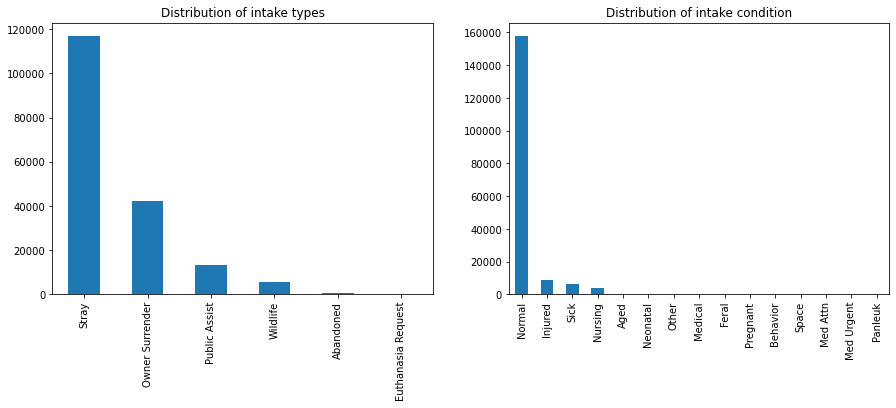

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2)
records['IntakeType'].value_counts().plot(kind='bar', ax=axes[0], figsize=(15,5), title = "Distribution of intake types")
records['IntakeCondition'].value_counts().plot(kind='bar', ax=axes[1], figsize=(15,5), title = "Distribution of intake condition")

In [132]:
intake_gb = records.groupby(['IntakeType','Outcome Type'])['Outcome Type'].count().unstack()
intake_gb = intake_gb.T

def get_perc(val,col):
    return val / intake_gb[col].sum() * 100

intake_gb_perc = pd.DataFrame()
for col in intake_gb.columns:
    intake_gb_perc[col] = intake_gb[col].apply(get_perc, args=(col,))

intake_gb_perc

,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
Outcome Type,,,,,,
Adoption,57.195572,7.746479,68.824085,16.662926,43.996549,0.129894
Died,0.492005,1.056338,0.467532,0.389076,0.808945,2.653554
Disposal,0.492005,0.704225,0.033058,0.448934,0.123008,7.737985
Euthanasia,0.738007,71.478873,2.066116,3.965582,2.708728,87.901280
Missing,NaN,NaN,0.033058,0.044893,0.065775,0.037113
Relocate,NaN,NaN,NaN,NaN,0.008542,0.259788
Return to Owner,9.717097,5.985915,7.234947,65.394688,22.776895,0.074225
Rto-Adopt,2.214022,NaN,1.031877,1.855593,0.801257,NaN
Transfer,29.151292,13.028169,20.309327,11.238309,28.710300,1.206161


In [134]:
# What are the top two outcomes by intake type?
def find_top_two_outcomes(col):
    col = col.sort_values(ascending=False)
    print (col[:2])

for col in intake_gb_perc.columns:
    find_top_two_outcomes(intake_gb_perc[col])

Outcome Type
Adoption    57.195572
Transfer    29.151292
Name: Abandoned, dtype: float64
Outcome Type
Euthanasia    71.478873
Transfer      13.028169
Name: Euthanasia Request, dtype: float64
Outcome Type
Adoption    68.824085
Transfer    20.309327
Name: Owner Surrender, dtype: float64
Outcome Type
Return to Owner    65.394688
Adoption           16.662926
Name: Public Assist, dtype: float64
Outcome Type
Adoption    43.996549
Transfer    28.710300
Name: Stray, dtype: float64
Outcome Type
Euthanasia    87.901280
Disposal       7.737985
Name: Wildlife, dtype: float64


## 5)How long does the average animal spend in the shelter? Does that differ based on animal type/gender/age? Which types of animals are adopted the quickest?

Median 6 days 00:00:00 -- true average stay
Mean 20 days 20:02:21.911088 -- mean is skewed by animals with long stays
Mode 0   0 days
dtype: timedelta64[ns] -- most likely transfered


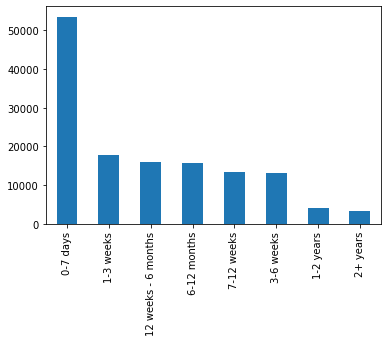

In [136]:
print ("Median", records["DateTime_length"].median(), "-- average stay")
print ("Mean", records["DateTime_length"].mean(), "-- animals with long stays")
print ("Mode", records["DateTime_length"].mode(), "-- most likely transfered")
records['Days_length'].value_counts().plot(kind="bar")

### What kinds of animals are in the shelter? How does that affect length of stay?

In [138]:
records['AnimalType'].value_counts()

Dog          113429
Cat           57736
Other          7450
Bird            662
Livestock        24
Name: AnimalType, dtype: int64

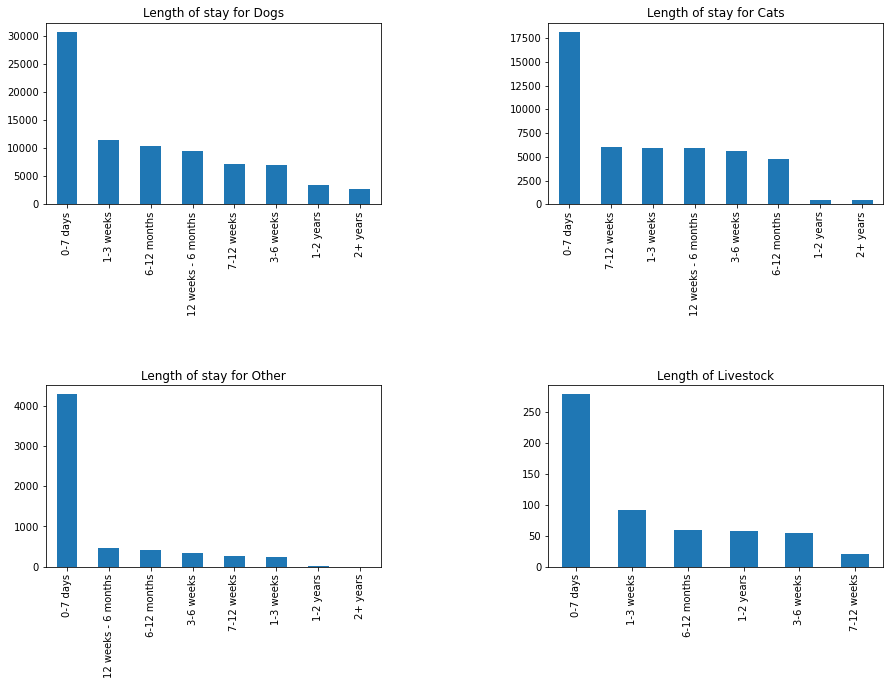

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=1, wspace = .5)

records[records["AnimalType"] == "Dog"]['Days_length'].value_counts().plot(kind='bar',ax=axes[0,0], figsize=(15,10), title = "Length of stay for Dogs")
records[records["AnimalType"] == "Cat"]['Days_length'].value_counts().plot(kind='bar',ax=axes[0,1], figsize=(15,10), title = "Length of stay for Cats")
records[records["AnimalType"] == "Other"]['Days_length'].value_counts().plot(kind='bar',ax=axes[1,0], figsize=(15,10), title = "Length of stay for Other")
records[records["AnimalType"] == "Bird"]['Days_length'].value_counts().plot(kind='bar',ax=axes[1,1], figsize=(15,10), title = "Length of stay for Birds")
records[records["AnimalType"] == "Livestock"]['Days_length'].value_counts().plot(kind='bar',ax=axes[1,1], figsize=(15,10), title = "Length of Livestock")

### Is there a significant difference between length of stay for Dogs and Cats?


In [141]:
from scipy.stats import ttest_ind

dog_records = records[records["AnimalType"] == "Dog"]
cat_records = records[records["AnimalType"] == "Cat"]

print ("Dog Mean: ", dog_records["DateTime_length"].mean())
print ("Dog Median: ", dog_records["DateTime_length"].median())
print ("Cat Mean: ", cat_records["DateTime_length"].mean())
print ("Cat Median: ", cat_records["DateTime_length"].median())
print (ttest_ind(dog_records["DateTime_length"].astype('timedelta64[D]'), cat_records["DateTime_length"].astype('timedelta64[D]')))

Dog Mean:  18 days 14:18:23.781219
Dog Median:  6 days 00:00:00
Cat Mean:  27 days 15:09:27.160870
Cat Median:  8 days 00:00:00
Ttest_indResult(statistic=-6.148200519207461, pvalue=7.853919856431647e-10)


#### Observation:- Average length of stay is slightly longer for cats.

### Given an animal is adopted, is there a significant difference between length of stay for Dogs and Cats?


In [142]:
dog_adopted_records = dog_records[dog_records["Outcome Type"] == "Adoption"]
cat_adopted_records = cat_records[cat_records["Outcome Type"] == "Adoption"]

print ("Dog Adopted Mean: ", dog_adopted_records["DateTime_length"].mean())
print ("Dog Adopted Median: ", dog_adopted_records["DateTime_length"].median())
print ("Cat Adopted Mean: ", cat_adopted_records["DateTime_length"].mean())
print ("Cat Adopted Median: ", cat_adopted_records["DateTime_length"].median())
print (ttest_ind(dog_adopted_records["DateTime_length"].astype('timedelta64[D]'), cat_adopted_records["DateTime_length"].astype('timedelta64[D]')))

Dog Adopted Mean:  25 days 11:05:54.192471
Dog Adopted Median:  8 days 00:00:00
Cat Adopted Mean:  39 days 07:13:45.961977
Cat Adopted Median:  29 days 00:00:00
Ttest_indResult(statistic=-7.250291558605658, pvalue=4.1950846713551154e-13)


#### Observation:- Average length of stay for adoptions is significantly longer for cats.

### Given an animal is adopted, is there a significant difference between length of stay for Female vs Male dogs and cats?


In [144]:
male_dog_adopted_records = dog_adopted_records[dog_adopted_records["Gender"] == "Male"]
female_dog_adopted_records = dog_adopted_records[dog_adopted_records["Gender"] == "Female"]
male_cat_adopted_records = cat_adopted_records[cat_adopted_records["Gender"] == "Male"]
female_cat_adopted_records = cat_adopted_records[cat_adopted_records["Gender"] == "Female"]

print ("Male Dog Adopted Mean: ", male_dog_adopted_records["DateTime_length"].mean())
print ("Female Dog Adopted Mean: ", female_dog_adopted_records["DateTime_length"].mean())
print ("Male Cat Adopted Mean: ", male_cat_adopted_records["DateTime_length"].mean())
print ("Female Cat Adopted Mean: ", female_cat_adopted_records["DateTime_length"].mean())

print ("Male vs Female Dog", ttest_ind(male_dog_adopted_records["DateTime_length"].astype('timedelta64[D]'), female_dog_adopted_records["DateTime_length"].astype('timedelta64[D]')))
print ("Male vs Female Cat", ttest_ind(male_cat_adopted_records["DateTime_length"].astype('timedelta64[D]'), female_cat_adopted_records["DateTime_length"].astype('timedelta64[D]')))

Male Dog Adopted Mean:  26 days 08:45:03.249097
Female Dog Adopted Mean:  24 days 12:00:35.347749
Male Cat Adopted Mean:  37 days 16:15:37.021642
Female Cat Adopted Mean:  40 days 20:47:27.827885
Male vs Female Dog Ttest_indResult(statistic=0.7671455554753858, pvalue=0.4429983382185665)
Male vs Female Cat Ttest_indResult(statistic=-1.2540292463370706, pvalue=0.20984167750275293)


#### Observation:- Not a significant difference between Dogs, but a significant difference between cats. Male animals are adopted faster than female.

### Given an animal is adopted, is there a significant difference between length of stay based on Age for dogs and cats?

In [146]:
print ("DOGS")
dog_adopted_records["DateTime_length_int"] = dog_adopted_records["DateTime_length"].astype('timedelta64[D]')
dog_adopted_records_gb_age = dog_adopted_records.groupby(["Age_Bucket"])["DateTime_length_int"].mean()
print (dog_adopted_records_gb_age)

print ("\nCATS")
cat_adopted_records["DateTime_length_int"] = cat_adopted_records["DateTime_length"].astype('timedelta64[D]')
cat_adopted_records_gb_age = cat_adopted_records.groupby(["Age_Bucket"])["DateTime_length_int"].mean()
print (cat_adopted_records_gb_age)

DOGS
Age_Bucket
1-3 years           24.939549
1-6 months          31.553665
1-6 weeks           12.844652
4-6 years           34.012135
7+ years            20.383304
7-12 months         25.099749
Less than 1 week    29.886994
Name: DateTime_length_int, dtype: float64

CATS
Age_Bucket
1-3 years           39.299623
1-6 months          42.340673
1-6 weeks           47.203899
4-6 years           26.738532
7+ years            34.952591
7-12 months         30.544025
Less than 1 week    66.415638
Name: DateTime_length_int, dtype: float64


<ipython-input-146-dd7941c83aec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_adopted_records["DateTime_length_int"] = dog_adopted_records["DateTime_length"].astype('timedelta64[D]')
<ipython-input-146-dd7941c83aec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_adopted_records["DateTime_length_int"] = cat_adopted_records["DateTime_length"].astype('timedelta64[D]')


## Are there certain months that people tend to make more adoptions on? What about certain days of the week (weekends)?
0 is Monday, 6 is Sunday

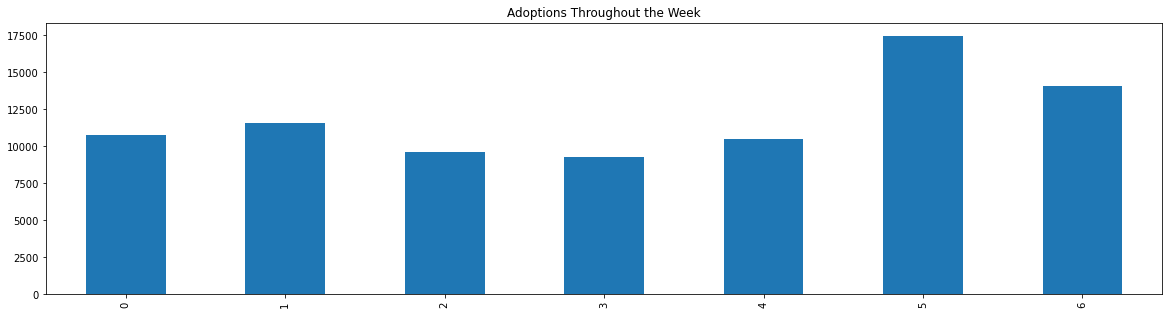

In [148]:
records[records['Outcome Type'] == "Adoption"]['Outcome_Date'].dt.dayofweek.value_counts().sort_index().plot(kind="bar", figsize=(20,5), title = "Adoptions Throughout the Week")

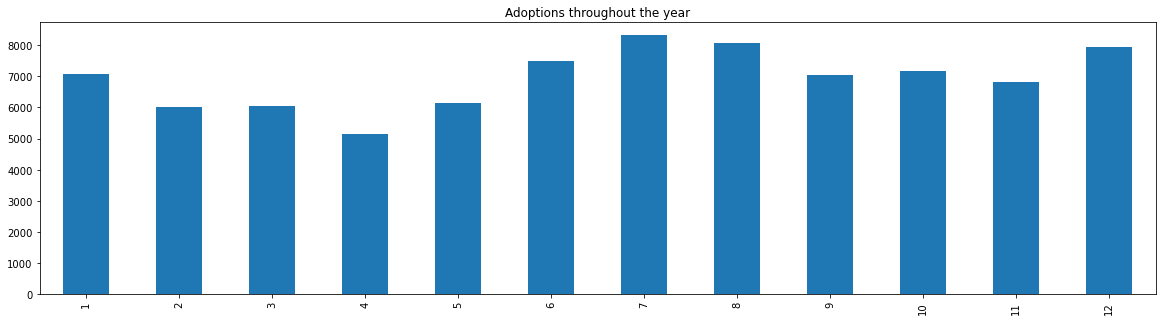

In [149]:
records[records['Outcome Type'] == "Adoption"]['Outcome_Date'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(20,5), title = "Adoptions throughout the year")

## 6)How does likelihood of being adopted vs euthanized vs return to owner vs transfer change based on animal type, gender, and age?

### What is the likelihood of outcomes based on Dog vs Cat?

In [151]:
print ("DOGS")
dog_records_outcome_gb = dog_records.groupby(['Outcome Type'])['Outcome Type'].count()
print (float(dog_records_outcome_gb["Adoption"]) / float(dog_records_outcome_gb.sum()) * 100, "% adopted")
print (float(dog_records_outcome_gb["Euthanasia"]) / float(dog_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(dog_records_outcome_gb["Return to Owner"]) / float(dog_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(dog_records_outcome_gb["Transfer"]) / float(dog_records_outcome_gb.sum()) * 100, "% transferred")

print ("\nCATS")
cat_records_outcome_gb = cat_records.groupby(['Outcome Type'])['Outcome Type'].count()
print (float(cat_records_outcome_gb["Adoption"]) / float(cat_records_outcome_gb.sum()) * 100, "% adopted")
print (float(cat_records_outcome_gb["Euthanasia"]) / float(cat_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(cat_records_outcome_gb["Return to Owner"]) / float(cat_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(cat_records_outcome_gb["Transfer"]) / float(cat_records_outcome_gb.sum()) * 100, "% transferred")

DOGS
47.555641776304185 % adopted
1.9549574970900498 % euthanized
31.2819653627738 % return to owner
17.568163380480406 % transferred

CATS
49.29155407746138 % adopted
3.7985865724381624 % euthanized
5.1756391602577425 % return to owner
39.75438231829834 % transferred


### What is the likelihood of outcomes based on gender?

In [154]:
print ("MALE DOGS")
male_dog_records_outcome_gb = dog_records[dog_records['Gender'] == "Male"].groupby(['Outcome Type'])['Outcome Type'].count()
print (float(male_dog_records_outcome_gb["Adoption"]) / float(male_dog_records_outcome_gb.sum()) * 100, "% adopted")
print (float(male_dog_records_outcome_gb["Euthanasia"]) / float(male_dog_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(male_dog_records_outcome_gb["Return to Owner"]) / float(male_dog_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(male_dog_records_outcome_gb["Transfer"]) / float(male_dog_records_outcome_gb.sum()) * 100, "% transferred")

print ("\nFEMALE DOGS")
female_dog_records_outcome_gb = dog_records[dog_records['Gender'] == "Female"].groupby(['Outcome Type'])['Outcome Type'].count()
print (float(female_dog_records_outcome_gb["Adoption"]) / float(female_dog_records_outcome_gb.sum()) * 100, "% adopted")
print (float(female_dog_records_outcome_gb["Euthanasia"]) / float(female_dog_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(female_dog_records_outcome_gb["Return to Owner"]) / float(female_dog_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(female_dog_records_outcome_gb["Transfer"]) / float(female_dog_records_outcome_gb.sum()) * 100, "% transferred")

print ("\nMALE CATS")
male_cat_records_outcome_gb = cat_records[cat_records['Gender'] == "Male"].groupby(['Outcome Type'])['Outcome Type'].count()
print (float(male_cat_records_outcome_gb["Adoption"]) / float(male_cat_records_outcome_gb.sum()) * 100, "% adopted")
print (float(male_cat_records_outcome_gb["Euthanasia"]) / float(male_cat_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(male_cat_records_outcome_gb["Return to Owner"]) / float(male_cat_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(male_cat_records_outcome_gb["Transfer"]) / float(male_cat_records_outcome_gb.sum()) * 100, "% transferred")

print ("\nFEMALE CATS")
female_cat_records_outcome_gb = cat_records[cat_records['Gender'] == "Female"].groupby(['Outcome Type'])['Outcome Type'].count()
print (float(female_cat_records_outcome_gb["Adoption"]) / float(female_cat_records_outcome_gb.sum()) * 100, "% adopted")
print (float(female_cat_records_outcome_gb["Euthanasia"]) / float(female_cat_records_outcome_gb.sum()) * 100, "% euthanized")
print (float(female_cat_records_outcome_gb["Return to Owner"]) / float(female_cat_records_outcome_gb.sum()) * 100, "% return to owner")
print (float(female_cat_records_outcome_gb["Transfer"]) / float(female_cat_records_outcome_gb.sum()) * 100, "% transferred")

MALE DOGS
45.14211762450271 % adopted
2.0962149898544475 % euthanized
34.36546357986228 % return to owner
16.542842991579988 % transferred

FEMALE DOGS
51.040092275873036 % adopted
1.7063081695966906 % euthanized
27.583326704319468 % return to owner
18.359716808527562 % transferred

MALE CATS
52.41529562016377 % adopted
3.8314176245210727 % euthanized
6.269250995417323 % return to owner
35.54954548869356 % transferred

FEMALE CATS
53.68327533871325 % adopted
3.031761308950914 % euthanized
4.701266010216925 % return to owner
36.884578366772786 % transferred


### What is the likelihood of outcome based on age?

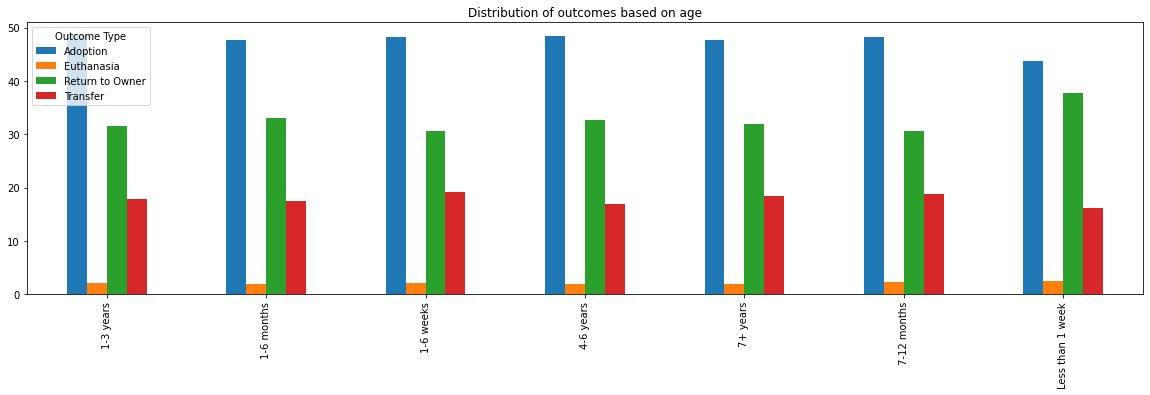

In [155]:
dog_records_outcome_age_gb = dog_records.groupby(['Outcome Type','Age_Bucket'])['Age_Bucket'].count().unstack()
# Drop outcomes we're not interested in
dog_records_outcome_age_gb = dog_records_outcome_age_gb.drop(dog_records_outcome_age_gb.index[[1,2,4,6]])

# Transform into a percentage
def get_perc_outcome(val,col):
    return float(val) / float(dog_records_outcome_age_gb[col].sum()) * 100

perc_dog_records_outcome_age_gb = pd.DataFrame()
for col in dog_records_outcome_age_gb.columns:
    perc_dog_records_outcome_age_gb[col] = dog_records_outcome_age_gb[col].apply(get_perc_outcome, args=(col,))

perc_dog_records_outcome_age_gb = perc_dog_records_outcome_age_gb.T
perc_dog_records_outcome_age_gb.plot(kind="bar", figsize=(20,5), title = "Distribution of outcomes based on age")

In [157]:
#records.columns = ['Animal_ID','Name_intake','DateTime_intake','MonthYear_intake','Found_Location','Intake_Type',\
#                   'IntakeCondition','Animal_Type_intake','Sex','Age','Breed_intake','Color_intake','Name_outcome',\
#                   'DateTime_outcome','MonthYear_outcome','Outcome_Type','Outcome_Subtype','Sex_upon_Outcome',\
#                   'Age_upon_Outcome','Gender','fixed_intake','fixed_outcome','fixed_changed','Age_Bucket',\
#                   'retriever','shepherd','beagle','terrier','boxer','poodle','rottweiler','dachshund',\
#                  'chihuahua','pit_bull','DateTime_length','Days_length']

## Feature Engineering on final Records dataset!:

In [218]:
#records.groupby(by=['Outcome Type'])['Animal_ID'].count()

In [162]:
records['Name_intake'] = records['Name_intake'].fillna('No Name')
records['Have_name_start'] = 0
records.loc[records['Name_intake'] != 'No Name','Have_name_start'] = 1
records['Name_outcome'] = records['Name_outcome'].fillna('No Name')
records['Have_name_end'] = 0
records.loc[records['Name_intake'] != 'No Name', 'Have_name_end'] = 1

# <span style="color:blue"> Implementing few prediction models to predict adoption vs other outcomes!</span>

In [208]:
# Set the target column for prediction
records['Target'] = 0
adopt_mask = records['Outcome Type'] == 'Adoption'
records.loc[adopt_mask, 'Target'] = 1
records

,Animal_ID,Name_intake,IntakeDate,FoundLocation,IntakeType,IntakeCondition,AnimalType,SexUponIntake,Breed_intake,Color_intake,...,poodle,rottweiler,dachshund,chihuahua,pit bull,DateTime_length,Days_length,Have_name_start,Have_name_end,Target
0,A786884,Brock,2019-03-01,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Beagle Mix,Tricolor,...,0,0,0,0,0,-52 days,NaN,1,1,0
1,A706918,Belle,2015-05-07,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,English Springer Spaniel,White & Liver,...,0,0,0,0,0,59 days,7-12 weeks,1,1,0
2,A724273,Runster,2016-04-14,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,Basenji Mix,Sable & White,...,0,0,0,0,0,7 days,0-7 days,1,1,0
3,A665644,Dummy,2013-10-21,Austin (TX),Stray,Sick,Cat,Intact Female,Domestic Shorthair Mix,Calico,...,0,0,0,0,0,0 days,0-7 days,1,1,0
4,A682524,Rio,2014-06-29,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,Doberman Pinsch & Australian Cattle Dog,Tan & Gray,...,0,0,0,0,0,3 days,0-7 days,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179296,A703597,Sunshine,2022-07-05,3601 Pierce Rd in Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,Domestic Medium Hair Mix,Lynx Point,...,0,0,0,0,0,-2566 days,NaN,1,1,1
179297,A850020,Shadow,2022-05-05,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,Labrador Retriever Mix,Black & White,...,0,0,0,0,0,-2 days,NaN,1,1,1
179298,A850020,Shadow,2022-01-17,Riverside And Commerce in Austin (TX),Stray,Injured,Dog,Intact Male,Labrador Retriever Mix,Black & White,...,0,0,0,0,0,106 days,12 weeks - 6 months,1,1,1
179299,A853682,Baxtor,2022-03-22,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,Australian Cattle Dog Mix,White & Black,...,0,0,0,0,0,2 days,0-7 days,1,1,1


In [167]:
# What's our baseline prediction accuracy?
majority = float(records['Target'].value_counts()[0])
total = records['Target'].value_counts().sum()
baseline = majority / total
print (format(baseline, '.4f') + '%')
records['Target'].value_counts()

0.5350%


0    95928
1    83373
Name: Target, dtype: int64

In [169]:
records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179301 entries, 0 to 179300
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Animal_ID           179301 non-null  object         
 1   Name_intake         179301 non-null  object         
 2   IntakeDate          179301 non-null  datetime64[ns] 
 3   FoundLocation       179301 non-null  object         
 4   IntakeType          179301 non-null  object         
 5   IntakeCondition     179301 non-null  object         
 6   AnimalType          179301 non-null  object         
 7   SexUponIntake       179300 non-null  object         
 8   Breed_intake        179301 non-null  object         
 9   Color_intake        179301 non-null  object         
 10  Age                 179301 non-null  object         
 11  Name_outcome        179301 non-null  object         
 12  Outcome_Date        179301 non-null  datetime64[ns] 
 13  Outcome Type  

# Decission Tree!

In [177]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
y, X = dmatrices('Target ~ Gender + Age_Bucket + AnimalType + IntakeType + IntakeCondition + retriever + shepherd + beagle + terrier + boxer + poodle + rottweiler + dachshund + chihuahua + Have_name_start + Have_name_end', data=records, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [202]:
from io import StringIO


model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X, y)
prediction_on_training = model.predict(X_train)
print ('Train accuracy:', metrics.accuracy_score(y_train, prediction_on_training))
prediction_on_test = model.predict(X_test)
print ('Test accuracy:', metrics.accuracy_score(y_test, prediction_on_test))
#dot_data = StringIO()
#export_graphviz(model, out_file=dot_data, feature_names=X.columns.values)
#pydot.graph_from_dot_data(dot_data.getvalue()).write_png('Tree Model')

Train accuracy: 0.6045306673688323
Test accuracy: 0.606417345462473


#  K-Nearest neighbors Model!

In [204]:
neighbor_list = [50,250,500]

for neighbor_num in neighbor_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=neighbor_num,
                                       weights='uniform',
                                       p=2)
    
    print ('Number of Neighbors:', neighbor_num)
    model.fit(X_train, y_train)
    prediction_on_training = model.predict(X_train)
    print ('Train accuracy:', metrics.accuracy_score(y_train, prediction_on_training))
    prediction_on_test = model.predict(X_test)
    print ('Test accuracy:', metrics.accuracy_score(y_test, prediction_on_test))
    print ('')

Number of Neighbors: 50


<ipython-input-204-7ce9aee4626f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


Train accuracy: 0.6061105401296175
Test accuracy: 0.6061795191945617

Number of Neighbors: 250


<ipython-input-204-7ce9aee4626f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


Train accuracy: 0.6119543705566078
Test accuracy: 0.6110351388310838

Number of Neighbors: 500


<ipython-input-204-7ce9aee4626f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


Train accuracy: 0.6126593675412593
Test accuracy: 0.6113918782329508



# Naive Bayes Model!

In [205]:
model = naive_bayes.MultinomialNB()
model.fit(X, y)
prediction_on_training = model.predict(X_train)
print ('Train accuracy:', metrics.accuracy_score(y_train, prediction_on_training))
prediction_on_test = model.predict(X_test)
print ('Test accuracy:', metrics.accuracy_score(y_test, prediction_on_test))

Train accuracy: 0.6087181795788704
Test accuracy: 0.6114513347999286


C:\Users\16508\anaconda3\envs\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Random forest Model!

In [206]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3)
model_rf.fit(X, y)
prediction_on_training = model_rf.predict(X_train)
print ('Train accuracy:', metrics.accuracy_score(y_train, prediction_on_training))
prediction_on_test = model.predict(X_test)
print ('Test accuracy:', metrics.accuracy_score(y_test, prediction_on_test))

<ipython-input-206-a6b272f7aef2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X, y)


Train accuracy: 0.6052866279909285
Test accuracy: 0.6114513347999286
